# Plotting full data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
test = pd.read_csv(
    "/Users/akseljoonas/Documents/mlfortnight/notebooks/lol_validation_3fold_experimental.csv"
)
train = pd.read_csv("/Users/akseljoonas/Documents/mlfortnight/data/raw/train.csv")

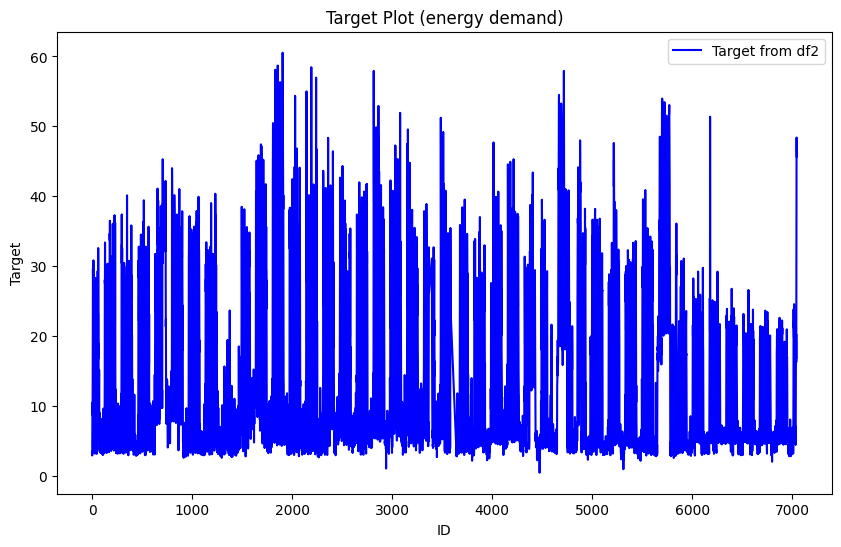

In [23]:
# Plot df2 from index 0 to 2000
plt.figure(figsize=(10, 6))
plt.plot(train["ID"], train["target"], label="Target from df2", color="blue")
plt.xlabel("ID")

plt.ylabel("Target")
plt.title("Target Plot (energy demand)")
plt.legend()
plt.show()

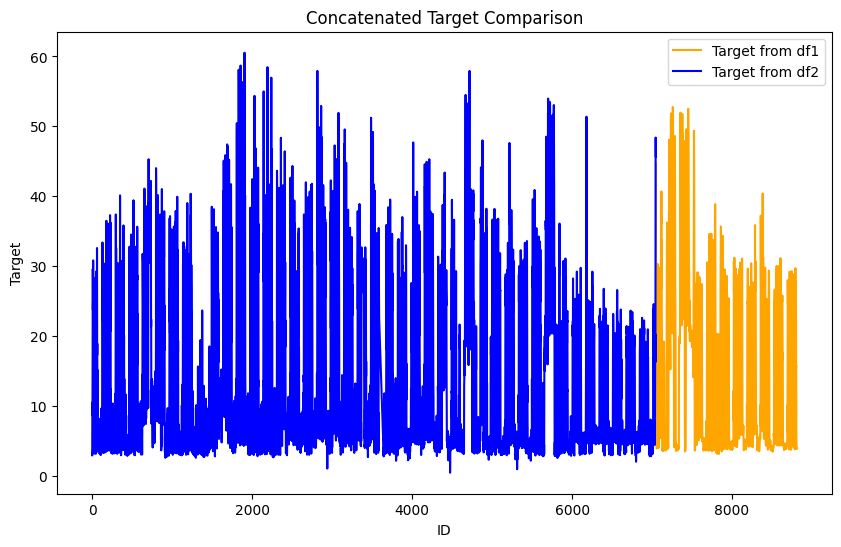

In [24]:

df_combined = pd.concat(
    [test[["ID", "target"]], train[["ID", "target"]]], keys=["df1", "df2"]
)

# Plot the combined data
plt.figure(figsize=(10, 6))
for key, group in df_combined.groupby(level=0):
    plt.plot(
        group["ID"],
        group["target"],
        label=f"Target from {key}",
        color="orange" if key == "df1" else "blue",
    )

# Add labels and title
plt.xlabel("ID")
plt.ylabel("Target")
plt.title("Concatenated Target Comparison")
plt.legend()

# Show the plot
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
test = pd.read_csv(
    "/Users/akseljoonas/Documents/mlfortnight/data/raw/test.csv"
)
train = pd.read_csv(
    "/Users/akseljoonas/Documents/mlfortnight/data/raw/train.csv"
)

# Remove rows from index 1250 to 1460 in the train DataFrame
# train = train.drop(train.index[1243:1468])
# df2 = df2.apply(lambda col: col ** (1 / 3) if col.dtype != "object" else col)

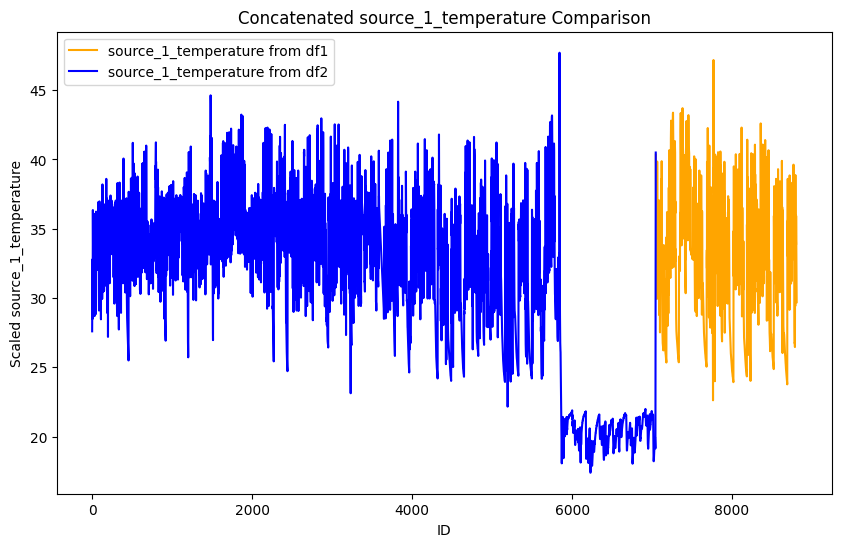

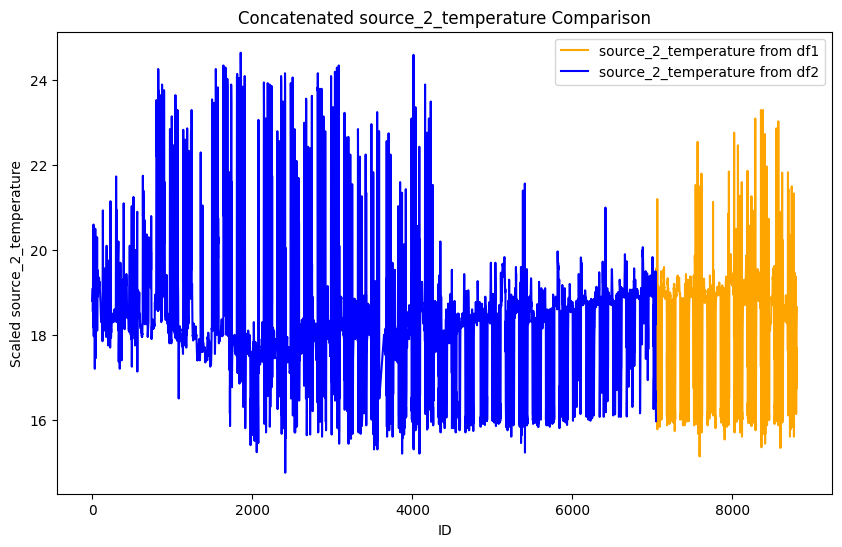

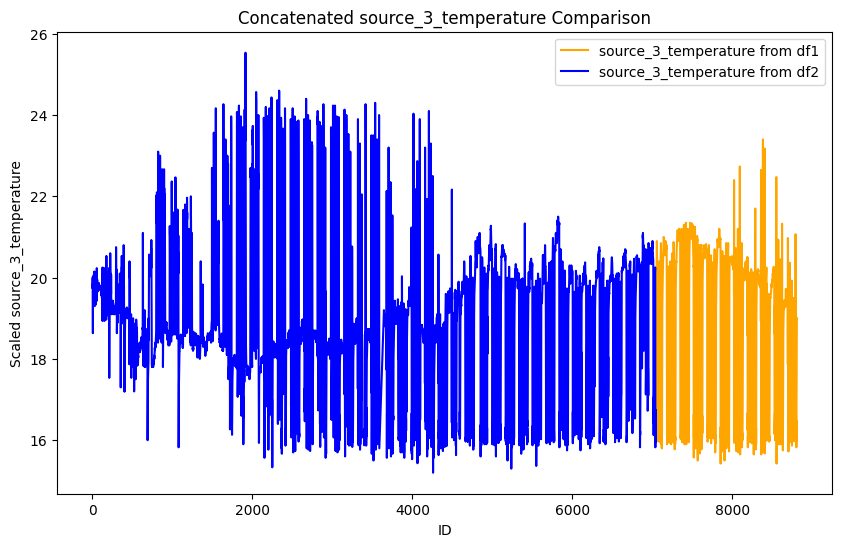

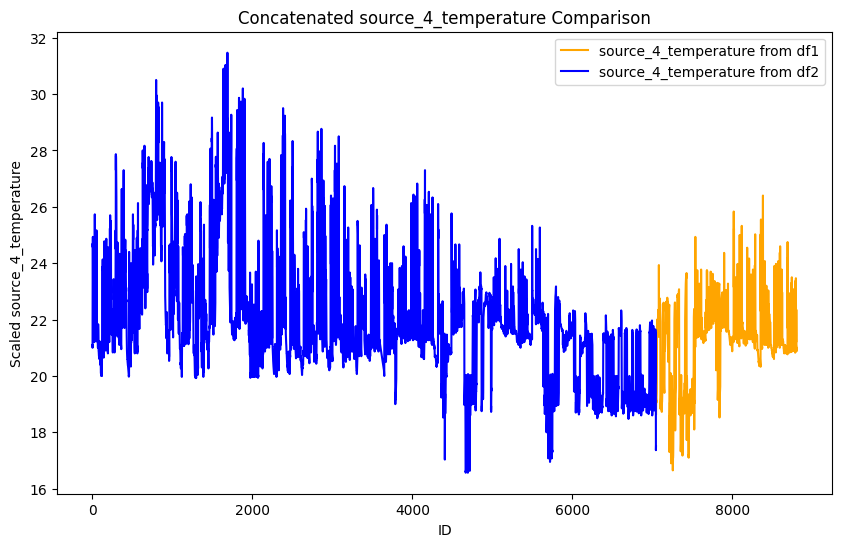

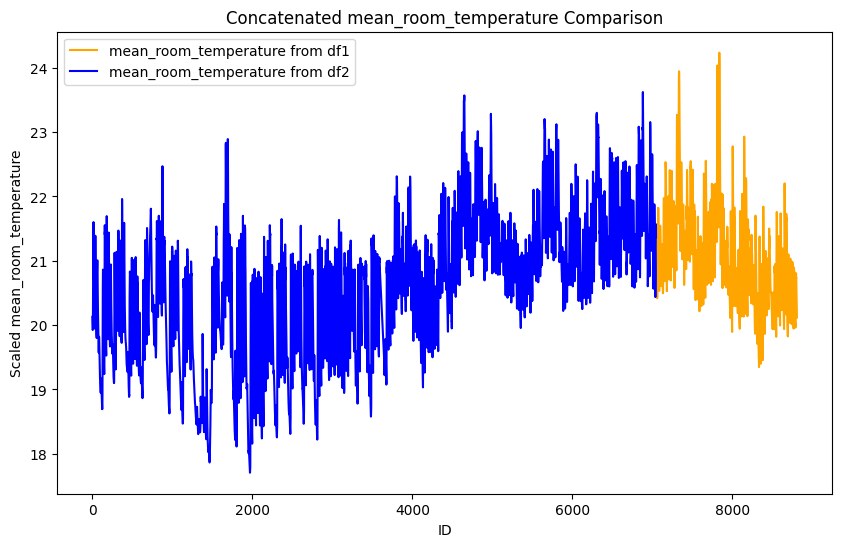

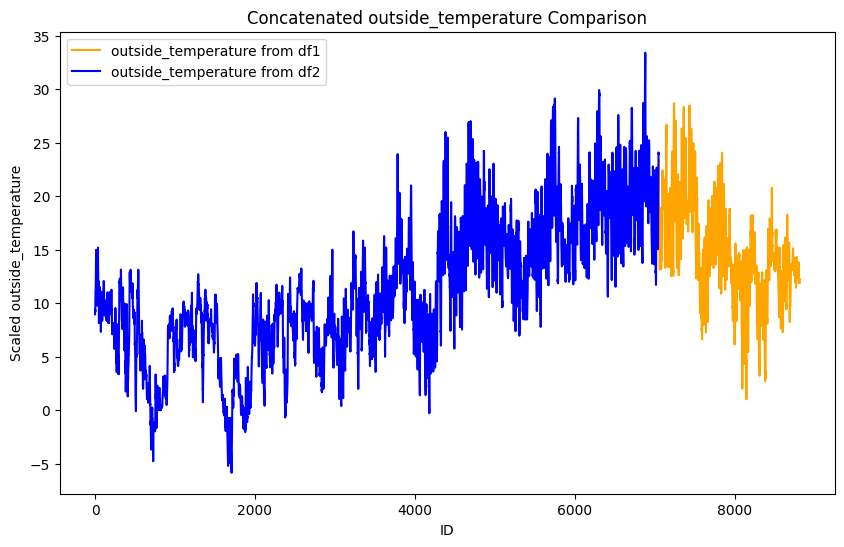

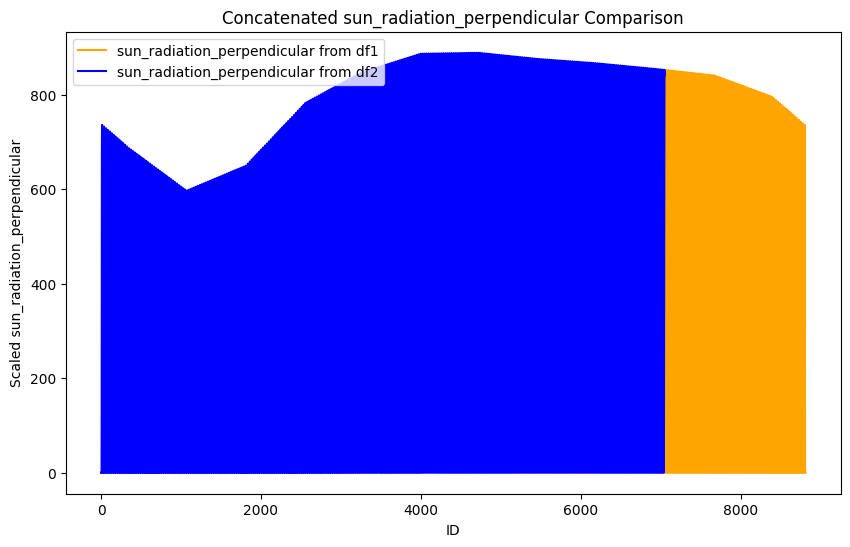

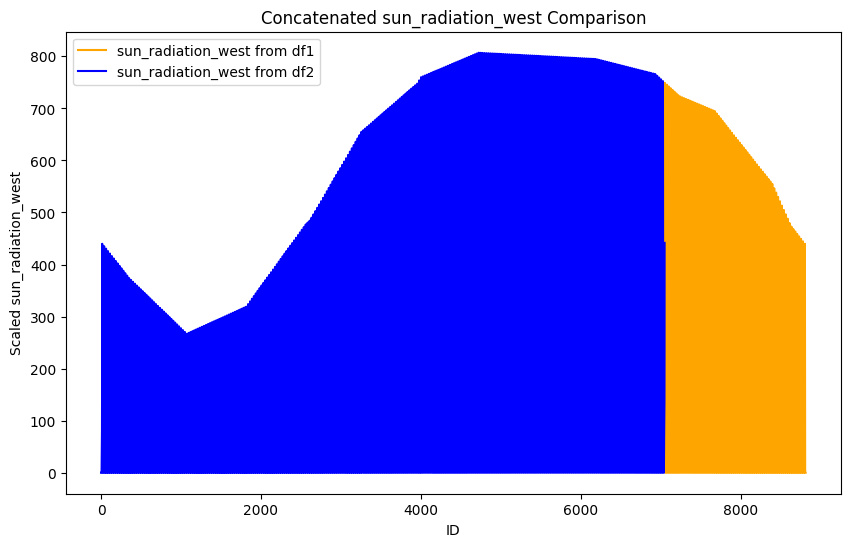

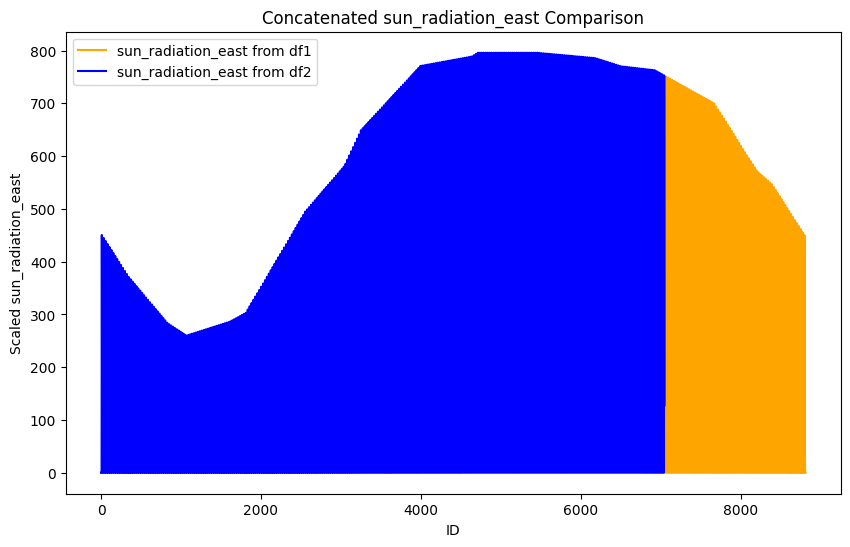

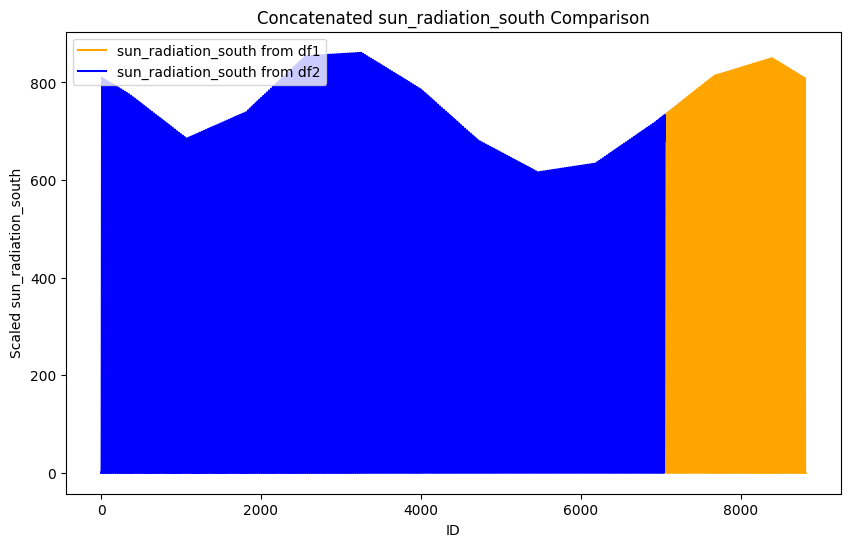

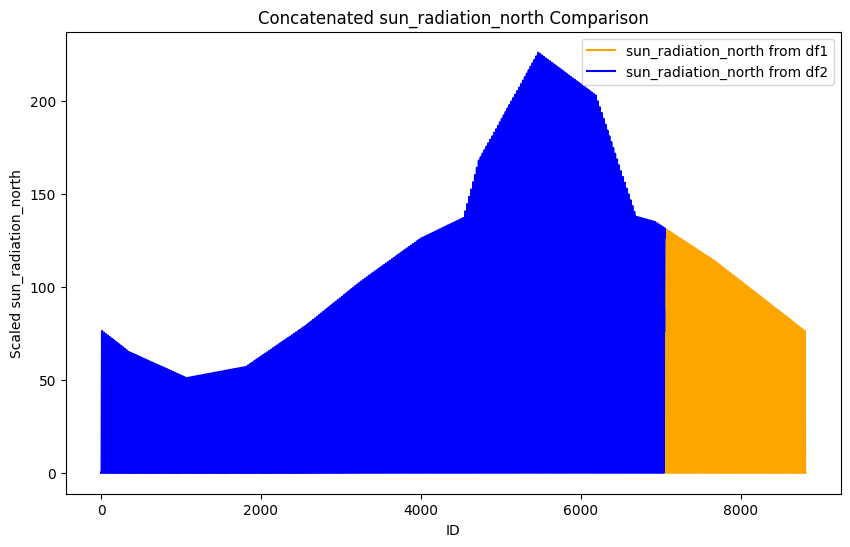

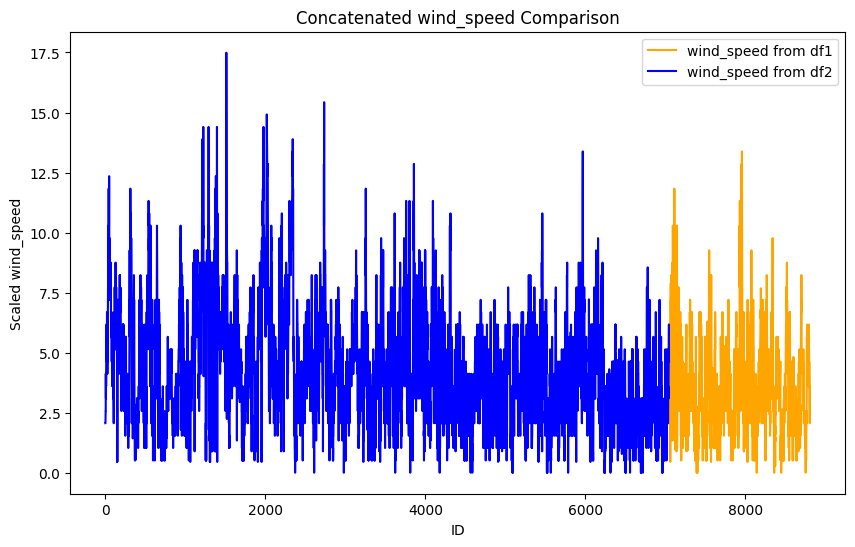

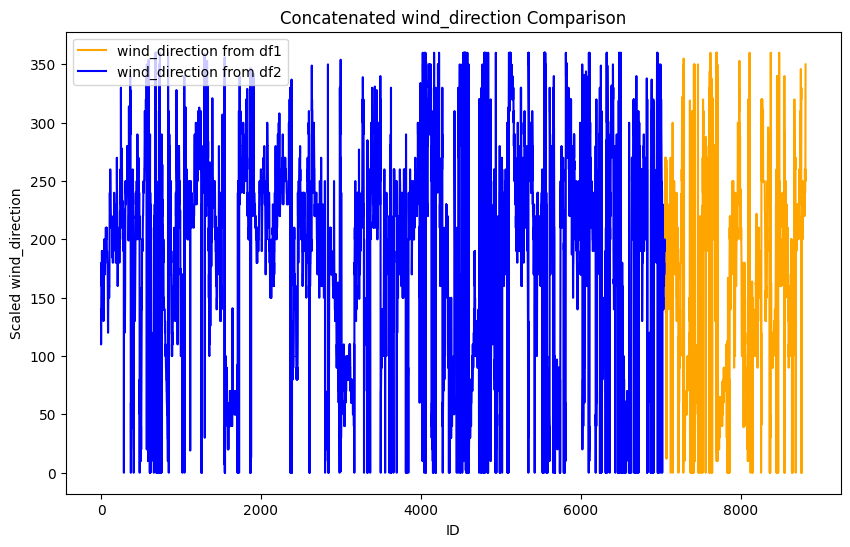

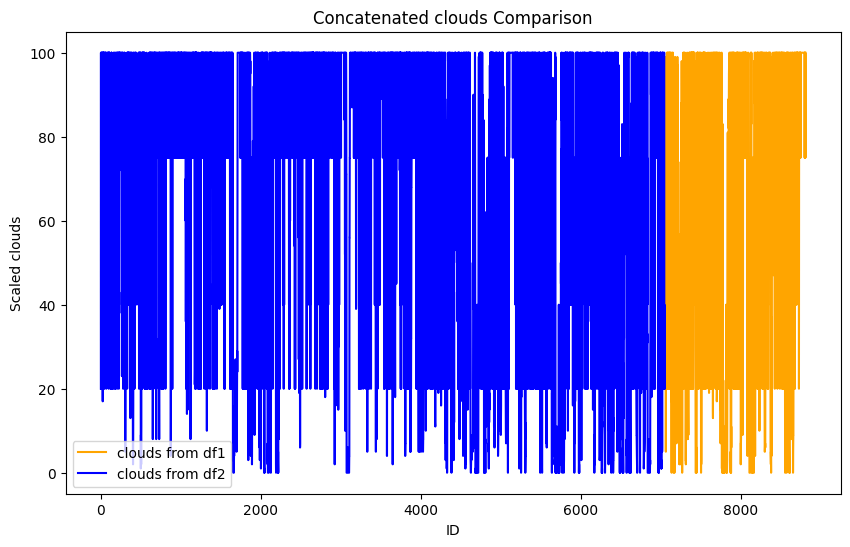

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Set this variable to True to plot the target, False otherwise
plot_target = False

# List of column names to plot
columns_to_plot = [
    "source_1_temperature",
    "source_2_temperature",
    "source_3_temperature",
    "source_4_temperature",
    "mean_room_temperature",
    "outside_temperature",
    "sun_radiation_perpendicular",
    "sun_radiation_west",
    "sun_radiation_east",
    "sun_radiation_south",
    "sun_radiation_north",
    "wind_speed",
    "wind_direction",
    "clouds",
]

scaler = MinMaxScaler()

for column in columns_to_plot:

    if plot_target:
        df_combined = pd.concat(
            [test[["ID", column]], train[["ID", column, "target"]]],
            keys=["df1", "df2"],
        )
    else:
        df_combined = pd.concat(
            [test[["ID", column]], train[["ID", column]]],
            keys=["df1", "df2"],
        )

    # MinMax scale the data
    if plot_target and "target" in df_combined.columns:
        df_combined[column] = scaler.fit_transform(
            df_combined[column].values.reshape(-1, 1)
        )
        df_combined["target"] = scaler.fit_transform(
            df_combined["target"].values.reshape(-1, 1)
        )
        # Smooth the target using a rolling mean
        df_combined["target"] = (
            df_combined["target"].rolling(window=8, min_periods=1).mean()
        )

    # Plot the combined data
    plt.figure(figsize=(10, 6))
    for key, group in df_combined.groupby(level=0):
        plt.plot(
            group["ID"],
            group[column],
            label=f"{column} from {key}",
            color="orange" if key == "df1" else "blue",
        )
        if plot_target and key == "df2":
            plt.plot(
                group["ID"],
                group["target"],
                label="Smoothed Target from df2",
                color="red",
                linestyle="--",
            )

    # Add labels and title
    plt.xlabel("ID")
    plt.ylabel(f"Scaled {column}")
    plt.title(f"Concatenated {column} Comparison")
    plt.legend()

    # Show the plot
    plt.show()

# Plotting by month

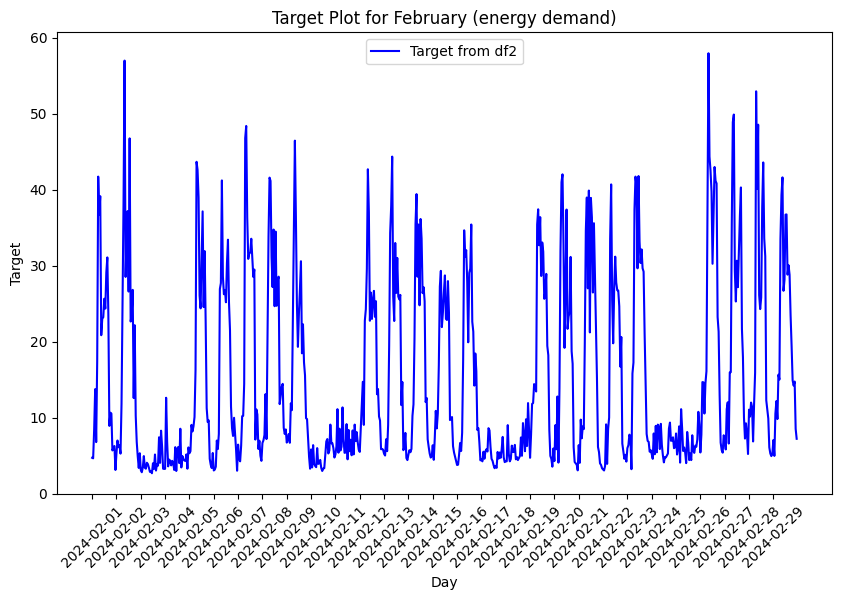

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
test = pd.read_csv("/Users/akseljoonas/Downloads/lol_inter_cbrt_features.csv")
train = pd.read_csv("/Users/akseljoonas/Documents/mlfortnight/data/raw/train.csv")

train = train.iloc[2208:2904]
test = test.iloc[2208:2904]

# Ensure 'measurement_time' is in datetime format
train["measurement_time"] = pd.to_datetime(train["measurement_time"])

# Plot df2 for the month of February (measurement_time index 2208 to 2904)
plt.figure(figsize=(10, 6))
plt.plot(
    train["measurement_time"],
    train["target"],
    label="Target from df2",
    color="blue",
)

# Set x-axis ticks by days in February
plt.xticks(
    ticks=pd.date_range(start="2024-02-01", end="2024-02-29", freq="D"),
    rotation=45,
)

plt.xlabel("Day")
plt.ylabel("Target")
plt.title("Target Plot for February (energy demand)")
plt.legend()
plt.show()